## Python Practice

Just some made up exercises.

Some additional practice:

* https://codingbat.com/python
* https://www.practicepython.org/
* https://www.hackerrank.com/domains/python
* https://www.codewars.com/collections/basic-python

Links from slides:
* https://automatetheboringstuff.com
* https://realpython.com/python-beginner-tips/

### Dictionary sum

Write a function that accepts a dictionary and threshold value.  The function should sum all of the dictionary values who's keys are greater than or equal to the threshold.  The dictionary will have both numeric keys and values (ie `{1: 2, 3: 4, 5: 6}`).

Example

```python
d = {1: 2, 3: 4, 5: 6}

your_function(d, 3)
# Expected output is 10.
# The keys 3 & 5 are greater than or equal to the threshold of 3.
# The values corresponding to the keys 3 & 5 are 4 & 6, and 4 + 6 = 10.
```

In [ ]:
def dict_sum(dictionary, threshold_value):
  threshold_dict = {k:v for k,v in dictionary.items() if k >= threshold_value}
  return sum(threshold_dict.values())

d = {1: 2, 3: 4, 5: 6}

print(dict_sum(d, 3))

10


### Pandas practice

> ##### Description
> The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).
>
> ##### Columns
A data frame with 32 observations on 11 (numeric) variables.
>
> ```
>  1. mpg    Miles/(US) gallon
>  2. cyl    Number of cylinders
>  3. disp   Displacement (cu.in.)
>  4. hp     Gross horsepower
>  5. drat   Rear axle ratio
>  6. wt     Weight (1000 lbs)
>  7. qsec   1/4 mile time
>  8. vs     Engine (0 = V-shaped, 1 = straight)
>  9. am     Transmission (0 = automatic, 1 = manual)
> 10. gear   Number of forward gears
> 11. carb   Number of carburetors
> ```

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

mtcars_url = 'https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv'

#Read the data frame using `mtcars_url`

In [ ]:
cars = pd.read_csv(mtcars_url)

#Print the first 8 rows of the dataframe.

In [ ]:
cars.head(8)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2


#Rename the first column to something more meaningful.

In [ ]:
cars.rename(columns={'Unnamed: 0': 'model'}, inplace=True)

cars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

#Plot the distribution of the `cyl` column.  Is this a continuous or discrete variable?

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


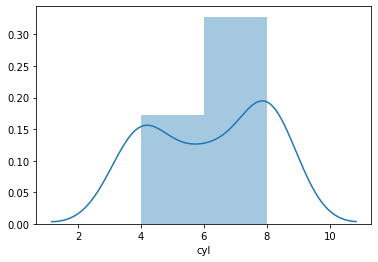

In [ ]:
import seaborn as sns
sns.set_style()

sns.distplot(cars["cyl"])

The cylinder column contains discrete variables. We are simply counting the number of cylinders.

#What is the minimum value in the `mpg` column?

In [ ]:
min(cars['mpg'])

10.4

The min value in mpg is 10.4

#What is the name of the car with `mpg` equal to `15.0`?

In [ ]:
cars_mpg_15 = cars['mpg'] == 15.0
cars_mpg_15 = cars.iloc[cars_mpg_15.values]
cars_mpg_15

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


Maserati Bora gets 15.0 mpg.

#What is the name of the car that has the best gas mileage?

In [ ]:
cars.nlargest(n=3, columns='mpg')

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


Toyota Corolla has the best gas mileage.

#Use your intuition from the variable descriptions and visulaizations to find 2 variables that appear to be *positively* correlated.

In [ ]:
cars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

I would expect 'cyl' and 'hp' columns to be positively correlated. The more cylinders that are added to an engine I would expect the horse power in the vehicle to increase. 

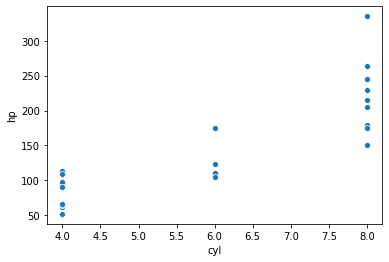

In [ ]:
sns.scatterplot(x ='cyl', y = 'hp', data = cars)

The scatterplot gives weight to our hypothesis. As number of cylinders increase, the horsepower increases.

#Use your intuition from the variable descriptions and visulaizations to find 2 variables that appear to be *negatively* correlated.

I would expect 'wt' and 'mpg' columns to be negatively correlated. As the vehicle's weight increases, I would expect the miles per gallon to decrease.

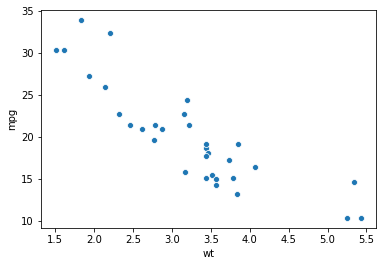

In [ ]:
sns.scatterplot(x='wt', y= 'mpg', data=cars)

The scatterplot illustrates that as vehicle weight increases gas mileage ('mpg') decreases.